# Project: Wrangling and Analyze WeRateDogs Data

## Data Gathering
In the cell below, we will gather **all** three pieces of data for this project and load them in the notebook. 

In [1]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import tweepy
import json
import requests
import os
from PIL import Image
from io import BytesIO
from timeit import default_timer as timer

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
tw_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
tw_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [4]:
# Create the request
img_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(img_url)
response

<Response [200]>

In [5]:
# Access the content and write to the file
with open (os.path.join(folder_name, img_url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
# confirm the directory
os.listdir(folder_name)

['image-predictions.tsv']

In [7]:
# Load the dataset
image_predictions_df = pd.read_csv('image-predictions/image-predictions.tsv', sep = '\t')
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
# Twitter API keys and access tokens
consumer_key = "MY CONSUMER KEY"
consumer_secret = "MY CONSUMER SECRET KEY"
access_token = "MY ACCESS TOKEN"
access_secret = "MY ACCESS SECRET"


from tweepy.auth import OAuthHandler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)



In [10]:
# Query twitter's API for JSON data for each tweet_id in the twitter archive
tweet_ids = tw_archive_df.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()

# save each tweet's JSON returned in a tweet_json.txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
13

Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
1561: 688519176466644993
Success
15

Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
18

Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
20

Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
23

In [11]:
# List of dictionaries to read the tweet's JSON data line by line.
df_list =[]

with open('tweet_json.txt', 'r') as json_file:
    for line in json_file:
        data = json.loads(line)
        tweet_id = data['id']
        created_at = data['created_at']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        # Append to list of dictionaries
        df_list.append({'tweet_id' : tweet_id,
                        'date_created' : created_at,
                        'favorite_count' : favorite_count,
                        'retweet_count' : retweet_count})

# Create a Dataframe from the List
tweet_count_df = pd.DataFrame(df_list, columns=['tweet_id', 'date_created', 
                                          'favorite_count', 'retweet_count'])
tweet_count_df

,tweet_id,date_created,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33697,6969
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29223,5272
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,21978,3464
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,36790,7191
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35182,7717
5,891087950875897856,Sat Jul 29 00:08:17 +0000 2017,17749,2586
6,890971913173991426,Fri Jul 28 16:27:12 +0000 2017,10331,1647
7,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,56667,15679
8,890609185150312448,Thu Jul 27 16:25:51 +0000 2017,24427,3604
9,890240255349198849,Wed Jul 26 15:59:51 +0000 2017,27848,6068


## Assessing Data
In this section, we will detect and document **quality issues** and **tidiness issues** where we will use both *visual assessment* and *programmatic assessement* to assess the data.

### **VISUAL & PROGRAMMATIC ASSESSMENTS**
#### **Visual Assessment**

In [12]:
tw_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [13]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
tweet_count_df

,tweet_id,date_created,favorite_count,retweet_count
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,33697,6969
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,29223,5272
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,21978,3464
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,36790,7191
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,35182,7717
5,891087950875897856,Sat Jul 29 00:08:17 +0000 2017,17749,2586
6,890971913173991426,Fri Jul 28 16:27:12 +0000 2017,10331,1647
7,890729181411237888,Fri Jul 28 00:22:40 +0000 2017,56667,15679
8,890609185150312448,Thu Jul 27 16:25:51 +0000 2017,24427,3604
9,890240255349198849,Wed Jul 26 15:59:51 +0000 2017,27848,6068


In visual assessment of the three datasets above we see;

From `tw_archive_df`table: The dog stages(doggo, floofer, pupper, puppo) are in separate columns instead one column; there are missing values in some columns (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id).

From `image_predictions` table: Some breed of dog predictions(p1_dog, p2_dog and p3_dog) are False.

#### **Programmatic Assessment**

In [15]:
tw_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1781,677698403548192770,NaN,NaN,2015-12-18 03:54:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie. She got her holidays confused. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677698403...,9,10,Sadie,None,None,None,None
643,793195938047070209,NaN,NaN,2016-10-31 21:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Lily. She's pupset that her costu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793195938...,12,10,Lily,None,None,None,puppo
1056,742161199639494656,NaN,NaN,2016-06-13 01:06:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Doug. He's trying to float away. 12/10...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742161199...,12,10,Doug,None,None,None,None
2156,669597912108789760,NaN,NaN,2015-11-25 19:25:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Skye. He is a Bretwaldian Altostratus....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669597912...,10,10,Skye,None,None,None,None
484,814638523311648768,NaN,NaN,2016-12-30 01:05:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Olivia. She's a passionate advocate of...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/814638523...,12,10,Olivia,None,None,None,None
218,850333567704068097,8.503288e+17,21955058.0,2017-04-07 13:04:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
180,857062103051644929,NaN,NaN,2017-04-26 02:41:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @AaronChewning: First time wearing my @dog_...,8.570611e+17,58709723.0,2017-04-26 02:37:47 +0000,https://twitter.com/AaronChewning/status/85706...,13,10,None,None,None,None,None
2268,667517642048163840,NaN,NaN,2015-11-20 01:39:42 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Dook &amp; Milo. Dook is struggling to...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667517642...,8,10,Dook,None,None,None,None
1803,676948236477857792,NaN,NaN,2015-12-16 02:13:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Karl. Karl thinks he's slick. 6/10 sne...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676948236...,6,10,Karl,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None


In [16]:
# concise summary of the dataframe
tw_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
# check for no. of missing values per columns
tw_archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
# Check how many are retweets
sum(~tw_archive_df.retweeted_status_id.isnull())

181

In [19]:
# Check how many are replies
sum(~tw_archive_df.in_reply_to_user_id.isnull())

78

In [20]:
# Check for duplicates in the data
sum(tw_archive_df.duplicated())

0

In [21]:
# Check tweets with missing url
len(tw_archive_df[tw_archive_df.expanded_urls.isnull()])

59

In [22]:
# Check for value counts of names
tw_archive_df.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Lola         10
Penny        10
Tucker       10
Bo            9
Winston       9
Sadie         8
the           8
Bailey        7
Toby          7
Daisy         7
an            7
Buddy         7
Oscar         6
Jack          6
Milo          6
Rusty         6
Dave          6
Bella         6
Koda          6
Scout         6
Stanley       6
Jax           6
Leo           6
Oakley        5
           ... 
Severus       1
Lilli         1
Tupawc        1
Amélie        1
Kaia          1
Mabel         1
Ziva          1
Willow        1
Orion         1
Anna          1
Kramer        1
Pavlov        1
Mason         1
Berkeley      1
Dook          1
Stark         1
Jangle        1
Kulet         1
Corey         1
Filup         1
Bode          1
General       1
Ridley        1
Randall       1
Bert          1
Nico          1
Arnold        1
Colin         1
Tug           1
Tango         1
Name: name, Length: 957,

In [23]:
# Check how many names are in lowercase and are not
tw_archive_df.name.str.islower().value_counts()

False    2247
True      109
Name: name, dtype: int64

In [24]:
# Ckeck the value counts for each lowercase names
tw_archive_df[tw_archive_df.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
just             4
one              4
quite            4
not              2
actually         2
mad              2
getting          2
old              1
my               1
space            1
his              1
incredibly       1
this             1
unacceptable     1
infuriating      1
all              1
by               1
such             1
life             1
light            1
officially       1
Name: name, dtype: int64

In [25]:
# Check names that are none
sum(tw_archive_df.name == 'None')

745

In [26]:
# Check for value counts for the dog stages columns
print(tw_archive_df.doggo.value_counts())
print(tw_archive_df.floofer.value_counts())
print(tw_archive_df.pupper.value_counts())
print(tw_archive_df.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [27]:
# Check for value counts for rating_denominator
tw_archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [28]:
# Count of tweets that the denominator is not 10
sum(tw_archive_df.rating_denominator != 10)

23

In [29]:
# Count of original tweets that the denominator is not 10
retweets_replies = (tw_archive_df.in_reply_to_status_id.isnull() & tw_archive_df.retweeted_status_id.isnull())
not_10 = (tw_archive_df.rating_denominator != 10) & retweets_replies
sum(not_10)

17

In [30]:
# Sort the value counts of rating_numerator
tw_archive_df.rating_numerator.value_counts().sort_index(ascending=False)

1776      1
960       1
666       1
420       2
204       1
182       1
165       1
144       1
143       1
121       1
99        1
88        1
84        1
80        1
75        2
60        1
50        1
45        1
44        1
27        1
26        1
24        1
20        1
17        1
15        2
14       54
13      351
12      558
11      464
10      461
9       158
8       102
7        55
6        32
5        37
4        17
3        19
2         9
1         9
0         2
Name: rating_numerator, dtype: int64

In [31]:
# Check for substring in text column
r= tw_archive_df[tw_archive_df.text.str.contains(r'(\d+\.\d*\/\d+)')]
r

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
1689,681340665377193984,6.813394e+17,4.196984e+09,2015-12-28 05:07:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've been told there's a slight possibility he...,NaN,NaN,NaN,NaN,5,10,None,None,None,None,None
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,None,None,None,None,None


In [32]:
print(tw_archive_df.text.iloc[45], [tw_archive_df.rating_numerator[45]])
print(tw_archive_df.text.iloc[340], [tw_archive_df.rating_numerator[340]])
print(tw_archive_df.text.iloc[695], [tw_archive_df.rating_numerator[695]])
print(tw_archive_df.text.iloc[763], [tw_archive_df.rating_numerator[763]])
print(tw_archive_df.text.iloc[1689], [tw_archive_df.rating_numerator[1689]])
print(tw_archive_df.text.iloc[1712], [tw_archive_df.rating_numerator[1712]])

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948 [5]
RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu… [75]
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS [75]
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq [27]
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace [5]
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD [26]


> As shown above, 6 of the numerators were extracted correctly. For example, row 45 the rating numerator extracted is 5 instead of 13.5

In [33]:
# Check for source value counts
tw_archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [34]:
image_predictions_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1529,789268448748703744,https://pbs.twimg.com/media/CvQLdotWcAAZn86.jpg,1,malamute,0.812860,True,Siberian_husky,0.120853,True,Eskimo_dog,0.024269,True
1471,779377524342161408,https://pbs.twimg.com/ext_tw_video_thumb/77937...,1,sundial,0.170921,False,cash_machine,0.060359,False,maze,0.054981,False
1100,720775346191278080,https://pbs.twimg.com/media/CgC1WqMW4AI1_N0.jpg,1,Newfoundland,0.489970,True,groenendael,0.174497,True,giant_schnauzer,0.079067,True
1451,776477788987613185,https://pbs.twimg.com/media/CsaaaaxWgAEfzM7.jpg,1,Labrador_retriever,0.884839,True,Chesapeake_Bay_retriever,0.057565,True,paintbrush,0.005766,False
35,666437273139982337,https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg,1,Chihuahua,0.671853,True,beagle,0.124680,True,Saluki,0.044094,True
1969,868622495443632128,https://pbs.twimg.com/media/DA33i0XXsAEQtCA.jpg,1,Labrador_retriever,0.868107,True,Great_Pyrenees,0.060973,True,Saint_Bernard,0.033489,True
185,669359674819481600,https://pbs.twimg.com/media/CUoLEG3XAAE65I0.jpg,1,Labrador_retriever,0.367818,True,German_short-haired_pointer,0.280642,True,Chesapeake_Bay_retriever,0.184246,True
732,686730991906516992,https://pbs.twimg.com/media/CYfCMdFWAAA44YA.jpg,1,Tibetan_mastiff,0.338812,True,Newfoundland,0.180925,True,golden_retriever,0.180023,True
1585,797545162159308800,https://pbs.twimg.com/media/CxFzFAAUAAA5C9z.jpg,1,Pembroke,0.954089,True,Cardigan,0.033644,True,papillon,0.009736,True
1584,797236660651966464,https://pbs.twimg.com/media/CxBafisWQAAtJ1X.jpg,2,collie,0.767005,True,Border_collie,0.100844,True,kelpie,0.048368,True


In [35]:
# concise summary of the dataframe
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
# Check for no. of duplicates in the data
sum(image_predictions_df.duplicated())

0

In [37]:
# Check how many image predictions are not dog breeds
image_predictions_df.query('(p1_dog == False) and (p2_dog == False) and (p3_dog == False)').count()

tweet_id    324
jpg_url     324
img_num     324
p1          324
p1_conf     324
p1_dog      324
p2          324
p2_conf     324
p2_dog      324
p3          324
p3_conf     324
p3_dog      324
dtype: int64

In [38]:
# check tweets in tw_archive_df that don't correspond to image_predictions_df and don't have images.
sum(~tw_archive_df.tweet_id.isin(image_predictions_df.tweet_id))

281

In [39]:
tweet_count_df.sample(5)

,tweet_id,date_created,favorite_count,retweet_count
1811,675888385639251968,Sun Dec 13 04:02:03 +0000 2015,2113,839
841,762035686371364864,Sat Aug 06 21:20:40 +0000 2016,29712,14227
2239,667517642048163840,Fri Nov 20 01:39:42 +0000 2015,331,165
1864,674752233200820224,Thu Dec 10 00:47:23 +0000 2015,1307,399
1720,679047485189439488,Mon Dec 21 21:15:11 +0000 2015,2051,585


In [40]:
# concise summary of the dataframe
tweet_count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
tweet_id          2327 non-null int64
date_created      2327 non-null object
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.8+ KB


In [41]:
# Check for no. of duplicates in the data
sum(tweet_count_df.duplicated())

0

### Quality issues
##### `tw_archive_df` table 
- Contains non-original tweets (retweets) and replies.

- There are missing values in retweet_status_id, retweeted_status_is, retweeted_status_timestamp, in_reply_to_status_id and in_reply_to_user_id columns.

- The datatype for timestamp column is string instead of datetime and tweet_id column is integer instead of string.

- The source column content includes unnecessary html code, there are four unique sources: Twitter for iPhone, Vine - Make a Scene, Twitter Web Client and TweetDeck.

- Some dog names are missing, some are invalid names and some are in lowercase.

- There are 6 tweets whose rating numerator weren't extracted correctly. Also rating denominator may not be extracted properly.

- The datatype for rating_numerator and rating_denominator is integer instead of float.

##### `image_predictions_df` table
- The datatype for tweet_id column is integer instead of string.

- Some predictions for the image(p1, p2, p3) are lowercase

- Some predictions for dog breed is not a dog

##### `tweet_count_df` table
- The datatypes for tweet_id column is integer instead of string.

### Tidiness issues
##### All 
- There are three dataframes.

##### `tw_archive_df` table 
- The dog stages variables (doggo, floofer, pupper, puppo) are in separate columns instead of one category column.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing the three dataframes.

In [42]:
# Make copies of original pieces of data
tw_archive_clean = tw_archive_df.copy()
image_predictions_clean = image_predictions_df.copy()
tweet_count_clean = tweet_count_df.copy()

### Tidiness Issue #1: *Merge the three dataframes*

#### Define:
Merge the three dataframes, first `tw_archive_clean` and `image_predictions_clean` then the new dataframe and `tweet_count` on tweet_id using merge function in Pandas.

#### Code

In [43]:
# Merge tw_archive_clean and image_predictions_clean
twitter_df_clean = pd.merge(tw_archive_clean, image_predictions_clean, how = 'inner', on = 'tweet_id')

In [44]:
# Merge twitter_df_clean and tweet_count_clean
twitter_df_clean = pd.merge(twitter_df_clean, tweet_count_clean, how = 'inner', on = 'tweet_id')

#### Test

In [45]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2057 entries, 0 to 2056
Data columns (total 31 columns):
tweet_id                      2057 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2057 non-null object
source                        2057 non-null object
text                          2057 non-null object
retweeted_status_id           71 non-null float64
retweeted_status_user_id      71 non-null float64
retweeted_status_timestamp    71 non-null object
expanded_urls                 2057 non-null object
rating_numerator              2057 non-null int64
rating_denominator            2057 non-null int64
name                          2057 non-null object
doggo                         2057 non-null object
floofer                       2057 non-null object
pupper                        2057 non-null object
puppo                         2057 non-null object
jpg_url                       2057 

In [46]:
twitter_df_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date_created,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,Tue Aug 01 16:23:56 +0000 2017,33697,6969
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,Tue Aug 01 00:17:27 +0000 2017,29223,5272
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,Mon Jul 31 00:18:03 +0000 2017,21978,3464
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,Sun Jul 30 15:58:51 +0000 2017,36790,7191
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Sat Jul 29 16:00:24 +0000 2017,35182,7717


### Quality issue #1: *Non-original tweets (retweets and replies)*

#### Define 1.(a)
Keep only rows that contain original tweets. Remove retweets by selecting rows that are null. Use isnull()

#### Code

In [47]:
# Remove retweets info
twitter_df_clean = twitter_df_clean[twitter_df_clean.retweeted_status_id.isnull()]
twitter_df_clean = twitter_df_clean[twitter_df_clean.retweeted_status_user_id.isnull()]
twitter_df_clean = twitter_df_clean[twitter_df_clean.retweeted_status_timestamp.isnull()]

#### Test

In [48]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 2056
Data columns (total 31 columns):
tweet_id                      1986 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1986 non-null object
source                        1986 non-null object
text                          1986 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1986 non-null object
rating_numerator              1986 non-null int64
rating_denominator            1986 non-null int64
name                          1986 non-null object
doggo                         1986 non-null object
floofer                       1986 non-null object
pupper                        1986 non-null object
puppo                         1986 non-null object
jpg_url                       1986 non

#### Define 1.(b)
Keep only rows that contain original tweets. Remove replies by selecting rows that are null. Use isnull()

#### Code

In [49]:
# Remove replies info
twitter_df_clean = twitter_df_clean[twitter_df_clean.in_reply_to_status_id.isnull()]
twitter_df_clean = twitter_df_clean[twitter_df_clean.in_reply_to_user_id.isnull()]

#### Test

In [50]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2056
Data columns (total 31 columns):
tweet_id                      1963 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1963 non-null object
source                        1963 non-null object
text                          1963 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1963 non-null object
rating_numerator              1963 non-null int64
rating_denominator            1963 non-null int64
name                          1963 non-null object
doggo                         1963 non-null object
floofer                       1963 non-null object
pupper                        1963 non-null object
puppo                         1963 non-null object
jpg_url                       1963 non-n

### Quality issue #2: *N/A columns in the dataframe*

#### Define
Drop all the null columns(`in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp`) using drop method.

#### Code

In [51]:
twitter_df_clean = twitter_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                          'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Test

In [52]:
twitter_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1963 entries, 0 to 2056
Data columns (total 26 columns):
tweet_id              1963 non-null int64
timestamp             1963 non-null object
source                1963 non-null object
text                  1963 non-null object
expanded_urls         1963 non-null object
rating_numerator      1963 non-null int64
rating_denominator    1963 non-null int64
name                  1963 non-null object
doggo                 1963 non-null object
floofer               1963 non-null object
pupper                1963 non-null object
puppo                 1963 non-null object
jpg_url               1963 non-null object
img_num               1963 non-null int64
p1                    1963 non-null object
p1_conf               1963 non-null float64
p1_dog                1963 non-null bool
p2                    1963 non-null object
p2_conf               1963 non-null float64
p2_dog                1963 non-null bool
p3                    1963 non-null obj

### Tidiness issue #2: *The dog stages should be in one category column.*

#### Define
Melt the four columns (`doggo`, `floofer`, `pupper`, `puppo`) into one column `dog_stage`

#### Code


In [53]:
# Replace all 'None' with empty string
twitter_df_clean.doggo.replace('None', '', inplace = True)
twitter_df_clean.floofer.replace('None', '', inplace = True)
twitter_df_clean.pupper.replace('None', '', inplace = True)
twitter_df_clean.puppo.replace('None', '', inplace = True)

In [54]:
# Merge the dog_stages into one column
twitter_df_clean['dog_stage'] = (twitter_df_clean['doggo'] + twitter_df_clean['floofer'] 
                                + twitter_df_clean['pupper'] + twitter_df_clean['puppo'])
# Fix rows with multiple dog stages
twitter_df_clean.loc[twitter_df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_df_clean.loc[twitter_df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_df_clean.loc[twitter_df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [55]:
# fix missing values 
twitter_df_clean.loc[twitter_df_clean.dog_stage == '', 'dog_stage'] = np.nan

In [56]:
# Drop the other dog stages columns
twitter_df_clean.drop(['doggo', 'pupper', 'puppo', 'floofer'], axis=1, inplace = True)

In [57]:
# convert dog_stage column datatype from string to category 
twitter_df_clean.dog_stage = twitter_df_clean.dog_stage.astype('category')

#### Test

In [58]:
# Confirm that the dog stages are in one column
twitter_df_clean.dog_stage.value_counts()

pupper            201
doggo              62
puppo              22
doggo, pupper       8
floofer             7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [59]:
# Confirm the dog stage column datatype is category
twitter_df_clean.dog_stage.dtype

CategoricalDtype(categories=['doggo', 'doggo, floofer', 'doggo, pupper', 'doggo, puppo',
                  'floofer', 'pupper', 'puppo'],
                 ordered=False)

### Quality issue #3: *Some predictions of dog breeds are not dogs.*

#### Define
Drop all rows where predictions of dog breed are not dogs

#### Code

In [60]:
# Keep rows with atleast one prediction True
twitter_df_clean = twitter_df_clean.query('(p1_dog == True) or (p2_dog == True) or (p3_dog == True)')

#### Test

In [61]:
# Check to confirm whether there rows without atleast one True
twitter_df_clean.loc[(twitter_df_clean['p1_dog'] == False) & 
                     (twitter_df_clean['p2_dog'] == False) & 
                     (twitter_df_clean['p3_dog'] == False)].any()

tweet_id              False
timestamp             False
source                False
text                  False
expanded_urls         False
rating_numerator      False
rating_denominator    False
name                  False
jpg_url               False
img_num               False
p1                    False
p1_conf               False
p1_dog                False
p2                    False
p2_conf               False
p2_dog                False
p3                    False
p3_conf               False
p3_dog                False
date_created          False
favorite_count        False
retweet_count         False
dog_stage             False
dtype: bool

### Quality issue #4: *Some prediction breed names are in lowercase*

#### Define
Capitalize the first letter of the three prediction breed names.

#### Code

In [62]:
# Capitalize the first letter of prediction breed names
twitter_df_clean['p1'] = twitter_df_clean['p1'].str.capitalize()
twitter_df_clean['p2'] = twitter_df_clean['p2'].str.capitalize()
twitter_df_clean['p3'] = twitter_df_clean['p3'].str.capitalize()

#### Test

In [63]:
twitter_df_clean.p1.head()

1                   Chihuahua
2                   Chihuahua
3                 Paper_towel
4                      Basset
5    Chesapeake_bay_retriever
Name: p1, dtype: object

In [64]:
twitter_df_clean.p2.head()

1              Pekinese
2              Malamute
3    Labrador_retriever
4      English_springer
5         Irish_terrier
Name: p2, dtype: object

In [65]:
twitter_df_clean.p3.head()

1                       Papillon
2                         Kelpie
3                        Spatula
4    German_short-haired_pointer
5                Indian_elephant
Name: p3, dtype: object

### Quality Issue #5: *timestamp and tweet_id column has erroneous datatype

#### Define 
Convert timestamp column datatype to datetime and tweet_id column datatype to string.

#### Code

In [66]:
# convert tweet_id datatype from integer to string
twitter_df_clean.tweet_id = twitter_df_clean.tweet_id.astype(str)

# convert timestamp datatype from string to datetime
twitter_df_clean.timestamp = pd.to_datetime(twitter_df_clean.timestamp)

#### Test

In [67]:
print(twitter_df_clean.tweet_id.dtype)
print(twitter_df_clean.timestamp.dtype)

object
datetime64[ns]


### Quality issue #6: *Source column contain unnecessary html link*

#### Define
Remove html link from source column to make more readable and convert source datatype to category

#### Code

In [68]:
# Define a function to strip the html link
def strip_html(x):
    return x.split('>', 1)[-1][: -4]
# apply the function to the source column
twitter_df_clean.source = twitter_df_clean.source.apply(strip_html)

In [69]:
# Convert the datatype of source column to category
twitter_df_clean.source = twitter_df_clean.source.astype('category')

#### Test

In [70]:
twitter_df_clean.source.value_counts()

Twitter for iPhone    1628
Twitter Web Client      22
TweetDeck                8
Name: source, dtype: int64

In [71]:
twitter_df_clean.source.dtypes

CategoricalDtype(categories=['TweetDeck', 'Twitter Web Client', 'Twitter for iPhone'], ordered=False)

### Quality issue #7: Missing, invalid dog names and in lowercase.

#### Define
Replace invalid and lowercase names with none.

#### Code

In [72]:
# Replace invalid and lowercase names with none
lower_names = twitter_df_clean.name.str.islower()
twitter_df_clean.loc[(lower_names), 'name'] = np.NaN
twitter_df_clean.name = twitter_df_clean.name.replace('None', np.NaN)

#### Test

In [73]:
twitter_df_clean.name.value_counts()

Cooper       10
Lucy          9
Tucker        9
Oliver        9
Charlie       9
Penny         8
Winston       7
Daisy         7
Sadie         7
Koda          6
Toby          6
Jax           6
Lola          6
Bella         5
Bo            5
Stanley       5
Oscar         5
Rusty         5
Leo           5
Brody         4
Maggie        4
Louis         4
Sophie        4
Winnie        4
Dexter        4
Bentley       4
George        4
Cassie        4
Dave          4
Bear          4
             ..
Carll         1
Gustav        1
Jeremy        1
Butter        1
Ozzie         1
Samsom        1
Blakely       1
Margo         1
Berkeley      1
Dobby         1
Grady         1
Rooney        1
Olaf          1
Rambo         1
Taco          1
Enchilada     1
Opie          1
Kloey         1
Puff          1
Strider       1
Chloe         1
Lorelei       1
Kanu          1
Chase         1
Flurpson      1
Dunkin        1
Raphael       1
Shooter       1
O             1
Tango         1
Name: name, Length: 830,

### Quality Issue #8: The rating_numerator has some incorrect values and rating_denominator may contain some incorrect values

#### Define
Extract rating numerator and denominator values from the text column using str.extract method

#### Code

In [74]:
twitter_df_clean[['rating_numerator', 'rating_denominator']] = twitter_df_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', 
                                                                                                 expand = True)

#### Test

In [75]:
twitter_df_clean.rating_numerator.value_counts()

12       419
10       356
11       352
13       217
9        132
8         68
7         32
14        21
6         16
5         13
4          7
3          5
2          2
45         1
1          1
80         1
0          1
24         1
11.27      1
88         1
144        1
60         1
44         1
121        1
165        1
50         1
84         1
9.75       1
13.5       1
99         1
11.26      1
Name: rating_numerator, dtype: int64

In [76]:
twitter_df_clean.rating_denominator.value_counts()

10     1642
50        3
11        2
80        2
40        1
120       1
20        1
70        1
90        1
7         1
150       1
110       1
2         1
Name: rating_denominator, dtype: int64

### Quality Issue #9: *The datatype of rating_numerator and rating_denominator are integer instead of float*

#### Define
Convert datatype for rating_numerator and rating_denominator from integer to float using astype method.

#### Code

In [77]:
# Convert rating_numerator and rating_denominator datatype to float
twitter_df_clean.rating_numerator = twitter_df_clean.rating_numerator.astype('float')
twitter_df_clean.rating_denominator = twitter_df_clean.rating_denominator.astype('float')

#### Test

In [78]:
print(twitter_df_clean.rating_numerator.dtype)
print(twitter_df_clean.rating_denominator.dtype)

float64
float64


## Storing Data
Then the gathered, assessed, and cleaned master dataset is saved to a CSV file named "twitter_archive_master.csv".

In [79]:
# Save the dataframe to CSV
twitter_df_clean.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, we will analyze and visualize wrangled data.

In [80]:
# Load the master dataset
twitter_master_df = pd.read_csv('twitter_archive_master.csv')
twitter_master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,date_created,favorite_count,retweet_count,dog_stage
0,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,Pekinese,0.090647,True,Papillon,0.068957,True,Tue Aug 01 00:17:27 +0000 2017,29223,5272,NaN
1,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,Malamute,0.078253,True,Kelpie,0.031379,True,Mon Jul 31 00:18:03 +0000 2017,21978,3464,NaN
2,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,Labrador_retriever,0.168086,True,Spatula,0.040836,False,Sun Jul 30 15:58:51 +0000 2017,36790,7191,NaN
3,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,Sat Jul 29 16:00:24 +0000 2017,35182,7717,NaN
4,891087950875897856,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10.0,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,...,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,Sat Jul 29 00:08:17 +0000 2017,17749,2586,NaN


In [81]:
# concise summary of the dataframe
twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 23 columns):
tweet_id              1658 non-null int64
timestamp             1658 non-null object
source                1658 non-null object
text                  1658 non-null object
expanded_urls         1658 non-null object
rating_numerator      1658 non-null float64
rating_denominator    1658 non-null float64
name                  1179 non-null object
jpg_url               1658 non-null object
img_num               1658 non-null int64
p1                    1658 non-null object
p1_conf               1658 non-null float64
p1_dog                1658 non-null bool
p2                    1658 non-null object
p2_conf               1658 non-null float64
p2_dog                1658 non-null bool
p3                    1658 non-null object
p3_conf               1658 non-null float64
p3_dog                1658 non-null bool
date_created          1658 non-null object
favorite_count        1658 non-null 

As shown above, we have to convert the datatypes of some columns again since they were lost after saving the dataframe to csv.

In [82]:
# Convert the datatypes
twitter_master_df.tweet_id = twitter_master_df.tweet_id.astype(str)
twitter_master_df.timestamp = pd.to_datetime(twitter_master_df.timestamp)
twitter_master_df.dog_stage = twitter_master_df.dog_stage.astype('category')
twitter_master_df.source = twitter_master_df.source.astype('category')

In [83]:
# concise summary of the dataframe
twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658 entries, 0 to 1657
Data columns (total 23 columns):
tweet_id              1658 non-null object
timestamp             1658 non-null datetime64[ns]
source                1658 non-null category
text                  1658 non-null object
expanded_urls         1658 non-null object
rating_numerator      1658 non-null float64
rating_denominator    1658 non-null float64
name                  1179 non-null object
jpg_url               1658 non-null object
img_num               1658 non-null int64
p1                    1658 non-null object
p1_conf               1658 non-null float64
p1_dog                1658 non-null bool
p2                    1658 non-null object
p2_conf               1658 non-null float64
p2_dog                1658 non-null bool
p3                    1658 non-null object
p3_conf               1658 non-null float64
p3_dog                1658 non-null bool
date_created          1658 non-null object
favorite_count        165

**Most Popular dog's stage**

In [84]:
# Value counts of dog_stages
dog_stages = twitter_master_df.dog_stage.value_counts()
dog_stages

pupper            166
doggo              53
puppo              21
floofer             7
doggo, pupper       7
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

In [85]:
# Proportion of dog_stages
twitter_master_df.dog_stage.value_counts(normalize=True)

pupper            0.648438
doggo             0.207031
puppo             0.082031
floofer           0.027344
doggo, pupper     0.027344
doggo, puppo      0.003906
doggo, floofer    0.003906
Name: dog_stage, dtype: float64

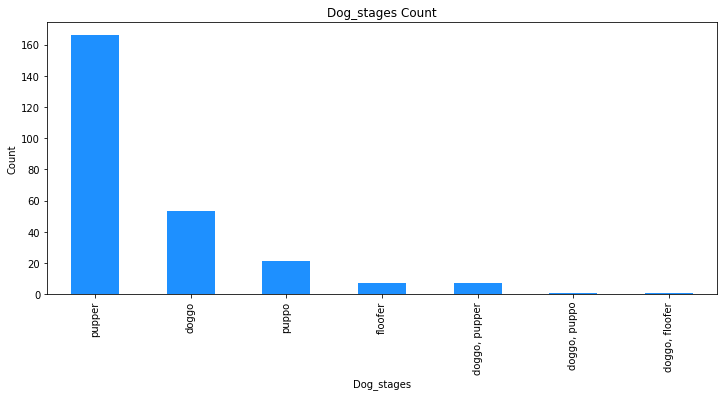

In [86]:
# plot a barplot for dog_stages
dog_stages.plot(kind='bar', color = 'dodgerblue', figsize=(12,5))
plt.title('Dog_stages Count')
plt.xlabel('Dog_stages')
plt.ylabel('Count');

Pupper is the most popular dog stage while doggo,floofer is the least popular dog stage.

**Top 10 dog names**

In [87]:
# filter top 10 names and value counts
top10_names = twitter_master_df.name.sort_values(ascending=False).value_counts()[1:10]
top10_names

Charlie    9
Lucy       9
Tucker     9
Oliver     9
Penny      8
Sadie      7
Daisy      7
Winston    7
Koda       6
Name: name, dtype: int64

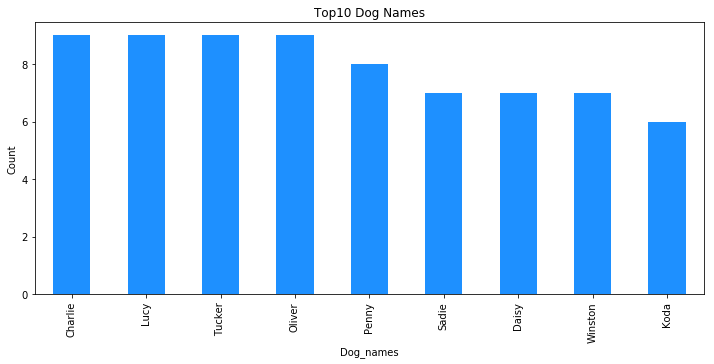

In [88]:
# Plot a barplot for top10 names
top10_names.plot(kind='bar', color = 'dodgerblue', figsize=(12,5))
plt.title('Top10 Dog Names')
plt.xlabel('Dog_names')
plt.ylabel('Count');

As shown above, Lucy, charlie, Oliver, Tucker, Penny, Sadie, Winston, Daisy and Lola are the most popular dog names.

**Relationship between Favorite count and retweet count**

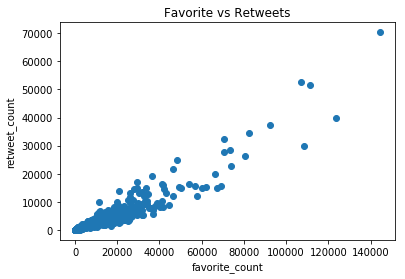

In [89]:
# Plot a scatterplot for relationship between favorite count and retweet count
plt.scatter(x='favorite_count', y='retweet_count', data=twitter_master_df)
plt.title('Favorite vs Retweets')
plt.xlabel('favorite_count')
plt.ylabel('retweet_count');

From the above scatter diagram, shows a positive association between favorite_count and retweet_count. Tweets with the higher favorite count tends to high retweet count. Lets examine the correlation further.

In [90]:
#correlation matrix between favorite_count and retweet_count
corr = twitter_master_df[['favorite_count','retweet_count']].corr()
corr

,favorite_count,retweet_count
favorite_count,1.000000,0.930444
retweet_count,0.930444,1.000000


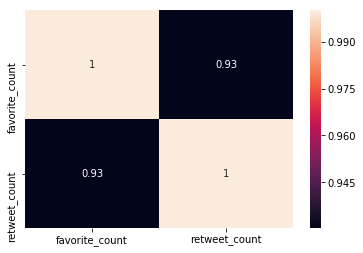

In [91]:
# Plot a heatmap for the correlation
sns.heatmap(corr, annot=True);

From the above heatmap diagram, shows that there is very high positive correlation of 0.93 between favorite_count and retweet_count and vice versa.

**Most Popular used twitter source**

In [92]:
# Proportion of twitter sources
twitter_master_df.source.value_counts(normalize=True)

Twitter for iPhone    0.981906
Twitter Web Client    0.013269
TweetDeck             0.004825
Name: source, dtype: float64

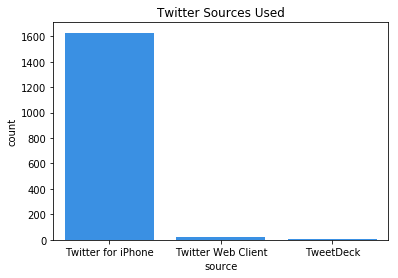

In [93]:
# Plot a countplot for source
sns.countplot(x ='source', 
              data = twitter_master_df,
              color = 'dodgerblue',
              order = twitter_master_df.source.value_counts().index).set(title='Twitter Sources Used');

From the above, twitter for iPhone is the most popular twitter source used by 98%.

### Insights:
1. Approximately 65% of WeRateDogs dogs are in pupper dog_stage which is most popular dog_stage.

2. Lucy, charlie, Oliver, Tucker, Penny, Sadie, Winston, Daisy and Lola are the top 10 most popular dog names for WeRateDogs.

3. There is very high positive correlation between favorite count and retweet count.

4. About 98% of tweets source are from twitter for iPhone.

### References

- https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

- https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

- https://www.google.com/amp/s/www.geeksforgeeks.org/how-to-drop-one-or-multiple-columns-in-pandas-dataframe/amp/

- https://stackoverflow.com/questions/62656422/to-check-pandas-dataframe-column-for-true-false-if-true-check-another-column-fo

- https://strftime.org/

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html

- https://www.statology.org/pandas-correlation-between-two-columns/

- https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count

- https://www.dataquest.io/blog/regular-expressions-data-scientists/